# 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

강아지 고양이 각 2000장 분류
- 기본 모델 정확도 71%
- 과대 적합을 줄이기 위해 데이터 증식(data augmentation) 사용시 정확도 82%
- 사전 훈련된 네트워크로 특성을 추출 정확도 90%
- 사전 훈련된 네트워크를 세밀하게 튜닝 정확도 92%

이런 세 가지 전략(처음부터 작은 모델을 훈련하기, 사전 훈련된 모델을 사용하여 특성 추출하기, 사전 훈련된 모델을 세밀하게 튜닝하기)은 작은 데이터셋에서 이미지 분류 문제를 수행할 때 여러분의 도구 상자에 포함되어 있어야 합니다.

### 5.2.1 작은 데이터셋 문제에서 딥러닝의 타당성
딥러닝은 데이터가 풍부할 때만 작동한다는 말은 부분적으로는 맞습니다. 하지만 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분할 수 있습니다.

### 5.2.2 데이터 내려받기
원본 데이터셋을 [https://www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data) 에서 내려받을 수 있습니다.

#### 코드 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [24]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [26]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [27]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [28]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [29]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [30]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


### 5.2.3 네트워크 구성하기
#### 코드 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기

In [31]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### 코드 5-6 모델의 훈련 설정하기

In [32]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

### 5.2.4 데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다.
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3. 그다음 부동 소수 타입의 텐서로 변환합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).

케라스는 이런 단계를 자동으로 처리하는 유틸리티가 있습니다.

#### 코드 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 파이썬 제너레이터 이해하기
```
def generator():
  i = 0
  while True:
    i += 1
    yield i

  for item in generator():
    print(item)
    if item > 4:
      break
```
다음과 같이 출력됩니다.
```
1
2
3
4
5
```

In [34]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


#### 코드 5-8 배치 제너레이터를 사용하여 모델 훈련하기

In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


InternalError: GPU sync failed

In [15]:
model.save('cats_and_dogs_small_1.h5')

#### 코드 5-10 훈련의 정확도와 손실 그래프 그리기

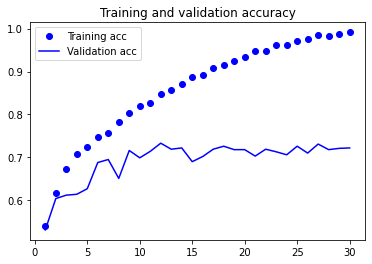

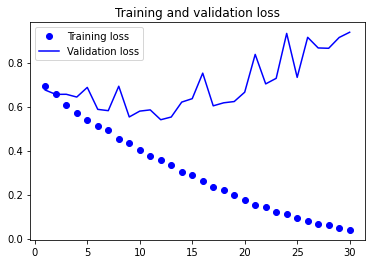

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면에 검증 정확도는 70~72%에서 멈추었습니다.

비교적 훈련 샘플 수(2000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해 보겠습니다.

### 5.2.5 데이터 증식 사용하기
데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다.

케라스에서는 ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다.

#### 코드 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

추가적인 매개변수가 몇 개 더 있습니다.
- rotation_range: 랜덤하게 사진을 회전시킬 각도(0~180)
- width_shift_range, height_shift_range: 사진을 수평과 수직으로 랜덤하게 평행 이동 시킬 범위(전체 너비와 높이에 대한 비율)
- shear_range: 랜덤하게 전단 변환(shearing transformation)을 적용할 각도 범위
- zoom_range: 랜덤하게 사진을 확대할 범위
- horizontal_flip: 랜덤하게 이미지를 수평으로 뒤집기
- fill_mode: 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

#### 코드 5-12 랜덤하게 증식된 훈련 이미지 그리기

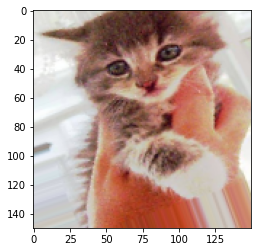

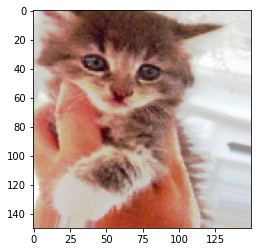

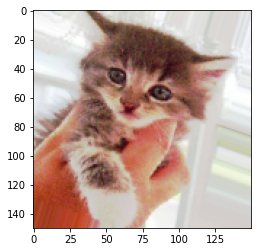

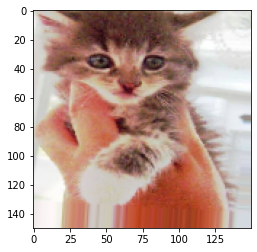

In [19]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

적은 수으 ㅣ원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큽니다. 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 dropout 층을 추가하겠습니다.

#### 코드 5-13 드롭아웃을 포함한 새로운 컨브넷 정의하기

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

#### 코드 5-14 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


NotFoundError: No algorithm worked!
	 [[Node: training_2/RMSprop/gradients/vgg16/block5_conv3/convolution_grad/Conv2DBackpropFilter = Conv2DBackpropFilter[T=DT_FLOAT, _class=["loc:@vgg16/block5_conv3/convolution"], data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](vgg16/block5_conv2/Relu, training_2/RMSprop/gradients/vgg16/block5_conv3/convolution_grad/ShapeN:1, training_2/RMSprop/gradients/vgg16/block5_conv3/Relu_grad/ReluGrad)]]

Caused by op 'training_2/RMSprop/gradients/vgg16/block5_conv3/convolution_grad/Conv2DBackpropFilter', defined at:
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\kernelapp.py", line 619, in start
    self.io_loop.start()
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f69cd34f0d30>", line 10, in <module>
    validation_steps=50)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\training_generator.py", line 40, in fit_generator
    model._make_train_function()
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\optimizers.py", line 256, in get_updates
    grads = self.get_gradients(loss, params)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\optimizers.py", line 89, in get_gradients
    grads = K.gradients(loss, params)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\backend\tensorflow_backend.py", line 2757, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 581, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 353, in _MaybeCompile
    return grad_fn()  # Exit early
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 581, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\nn_grad.py", line 481, in _Conv2DGrad
    data_format)]
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 703, in conv2d_backprop_filter
    use_cudnn_on_gpu=use_cudnn_on_gpu, data_format=data_format, name=name)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'vgg16/block5_conv3/convolution', defined at:
  File "C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 29 identical lines from previous traceback]
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-fada20b82f7d>", line 5, in <module>
    model.add(conv_base)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\sequential.py", line 165, in add
    layer(x)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\network.py", line 564, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\engine\network.py", line 721, in run_internal_graph
    layer.call(computed_tensor, **kwargs))
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\layers\convolutional.py", line 171, in call
    dilation_rate=self.dilation_rate)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\keras\backend\tensorflow_backend.py", line 3650, in conv2d
    data_format=tf_data_format)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 751, in convolution
    return op(input, filter)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 835, in __call__
    return self.conv_op(inp, filter)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 499, in __call__
    return self.call(inp, filter)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 187, in __call__
    name=self.name)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 630, in conv2d
    data_format=data_format, name=name)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): No algorithm worked!
	 [[Node: training_2/RMSprop/gradients/vgg16/block5_conv3/convolution_grad/Conv2DBackpropFilter = Conv2DBackpropFilter[T=DT_FLOAT, _class=["loc:@vgg16/block5_conv3/convolution"], data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](vgg16/block5_conv2/Relu, training_2/RMSprop/gradients/vgg16/block5_conv3/convolution_grad/ShapeN:1, training_2/RMSprop/gradients/vgg16/block5_conv3/Relu_grad/ReluGrad)]]


데이터 증식과 드롭아웃 덕택에 더 이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성했습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크 층의 수 등) 86% 나 87% 정도까지더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다.

## 5.3 사전 훈련된 컨브넷 사용하기

작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법은 사전 훈련된 네트워크를 사용하는 것입니다. 사전 훈련된 네트워크(pretrained network)는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크입니다. 원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 네트워크에 의해 가습된 특성의 계층 구조는 실제 세상에 대한 일반적인 모델로 효율적인 역할을 할 수 있습니다.

여기에서는 (1400만 개의 레이블된 이미지와 1000개의 클래스로 이루어진) ImageNet 데이터 셋에서 훈련된 대규모 컨브넷을 사용해 보겠습니다.

2014년에 개발한 VGG16 구조를 사용하겠습니다. VGG16은 조금 오래되었고 최고 수준의 성능에는 못 미치며 최근의 다른 모델보다는 조금 무겁습늬다.

사전 훈련된 네트워크를 사용하는 두 가지 방법이 있습니다. 특성 추출(feature extraction)과 미세 조정(fine tuning)입니다

### 5.3.1 특성 추출
특성 추출은 사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것입니다. 이런 특성을 사용하여 새로운 분류기를 처음부터 훈련합니다.

첫 번째 부분을 모델의 합성곱 기반 층(convolutional base)이라고 부르겠습니다. 컨브넷의 경우 특성 추출은 사전에 훈련된 네트워크의 합성곱 기반 층을 선택하여 새로운 데이터를 통과시키고, 그 출력으로 새로운 분류기를 훈련합니다.

왜 합성곱 층만 재사용할까요? 완전 연결 분류기도 재사용할 수 있을까요? 일반적으로 권장하지 않습니다. 합성곱 층에 의해 학습된 표현이 더 일반적이어서 재사용이 가능하기 때문입니다. 모델의 하위 층은 (에지, 색깔, 질감 등) 지역적이고 매우 일반적인 특성 맵을 추출합니다. 반면에 상위 층은 ('강아지 눈'이나 '고양이 귀'처럼) 좀 더 추상적인 개념을 추출합니다.

VGG16 모델은 케라스에 패키지로 포함되어 있습니다. keras.applications 모듈에서 사용 가능한 이미지 분류 모델은 다음과 같습니다.
- Xception
- Inception V3
- ResNet50
- VGG16
- VGG19
- MobileNet

#### 코드 5-16 VGG16 합성곱 기반 층 만들기

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

VGG16 함수에 3개의 매개변수를 전달합니다.
- weights는 모델을 초기화할 가중치 체크포인트를 지정합니다.
- include_top은 네트워크의 최상위 완전 연결 분류기를 포함할 지 안 할지 지정합니다. 기본 값은 ImageNet의 클래스 1000개에 대응되는 완전 연결 분류기를 포함합니다. 별도의 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않습니다.
- input_shape은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.

In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

이 지점에서 두 가지 방식이 가능합니다.

#### 데이터 증식을 사용하지 않는 빠른 특성 추출

#### 코드 5-17 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출된 특성의 크기는 (samples, 4, 4, 512)입니다. 완전 연결 분류기에 주입하기 위해서 먼저 (samples, 8192) 크기로 펼칩니다.

In [9]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

그러고 나서 완전 연결 분류기를 정의하고(규제를 위해 드롭아웃을 사용합니다) 저장된 데이터와 레이블을 사용하여 훈련합니다.

#### 코드 5-18 완전 연결 분류기를 정의하고 훈련하기

In [10]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 853us/step - loss: 0.6001 - acc: 0.6715 - val_loss: 0.4564 - val_acc: 0.8140
Epoch 2/30
2000/2000 [==============================] - 1s 480us/step - loss: 0.4201 - acc: 0.8150 - val_loss: 0.3657 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 1s 466us/step - loss: 0.3532 - acc: 0.8575 - val_loss: 0.3300 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 1s 452us/step - loss: 0.3226 - acc: 0.8675 - val_loss: 0.3063 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 1s 468us/step - loss: 0.2803 - acc: 0.8875 - val_loss: 0.2891 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 1s 456us/step - loss: 0.2677 - acc: 0.8910 - val_loss: 0.2989 - val_acc: 0.8740
Epoch 7/30
2000/2000 [==============================] - 1s 485us/step - loss: 0.2509 - acc: 0.8940 - val_loss: 0.2685 - val_acc: 0.8970


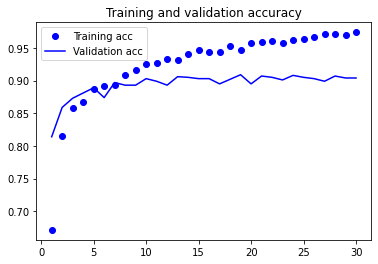

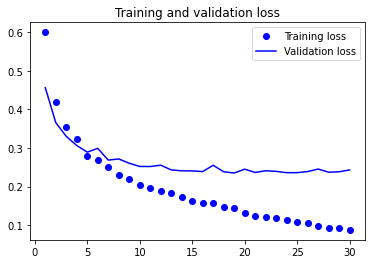

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

약 90%의 검증 정확도에 도달했습니다. 하지만 이 그래프는 많은 비율로 드롭아웃을 사용했음에도 훈련을 시작하면서 거의 바로 과대적합되고 있다는 것을 보여 줍니다. 작은 이미지 데이터셋에서는 과대적합을 막기 위해 필수적인 데이터 증식을 사용하지 않았기 때문입니다.

#### 데이터 증식을 사용한 특성 추출

#### 코드 5-20 합성곱 기반 층 위에 완전 연결 분류기 추가하기

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결하는 것이 아주 중요합니다. 하나 이상의 층을 동결(freezing)한다는 것은 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 뜻입니다. 이렇게 하지 않으면 합성곱 기반 층에 의해 사전에 학습된 표현이 훈련하는 동안 수정될 것입니다. 맨 위의 Dense 층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 네트워크에 전파될 것입니다. 이는 사전에 학습된 표현을 크게 훼손하게 됩니다.

케라스에서는 trainable 속성을 False로 설정하여 네트워크를 동결할 수 있습니다.

In [13]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


이렇게 설정하면 추가한 2개의 Dense 층 가중치만 훈련될 것입니다. 층마다 2개씩(가중치 행렬과 편향 벡터) 총 4개의 텐서가 훈련됩니다. 변경 사항을 적용하려면 먼저 모델을 컴파일해야 합니다. 컴파일 단계 후에 trainable 속성을 변경하면 반드시 모델을 다시 컴파일해야 합니다.

#### 5-21 동결된 합성곱 기반 층과 함께 모델을 엔드-투-엔드로 훈련하기

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 17s - loss: 0.5394 - acc: 0.7480 - val_loss: 0.4162 - val_acc: 0.8350
Epoch 2/30
 - 15s - loss: 0.4077 - acc: 0.8395 - val_loss: 0.3368 - val_acc: 0.8710
Epoch 3/30
 - 15s - loss: 0.3572 - acc: 0.8535 - val_loss: 0.3043 - val_acc: 0.8780
Epoch 4/30
 - 15s - loss: 0.3272 - acc: 0.8625 - val_loss: 0.2855 - val_acc: 0.8820
Epoch 5/30
 - 15s - loss: 0.3055 - acc: 0.8720 - val_loss: 0.2908 - val_acc: 0.8730
Epoch 6/30
 - 15s - loss: 0.2918 - acc: 0.8805 - val_loss: 0.2667 - val_acc: 0.8880
Epoch 7/30
 - 15s - loss: 0.2764 - acc: 0.8890 - val_loss: 0.2604 - val_acc: 0.8960
Epoch 8/30
 - 15s - loss: 0.2760 - acc: 0.8895 - val_loss: 0.2553 - val_acc: 0.8930
Epoch 9/30
 - 15s - loss: 0.2551 - acc: 0.9005 - val_loss: 0.2581 - val_acc: 0.9030
Epoch 10/30
 - 15s - loss: 0.2540 - acc: 0.9035 - val_loss: 0.2590 - val_acc: 0.8930
Epoch 11/30
 - 15s - loss: 0.2452 - acc: 0.9010 - val_loss: 0.2443 - val_ac

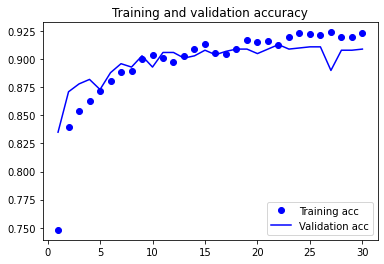

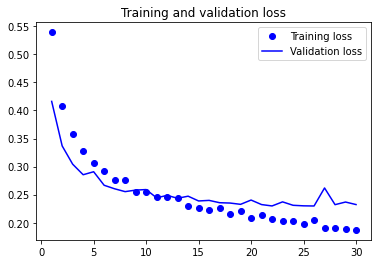

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도가 이전과 비슷하지만 처음부터 훈련시킨 소규모 컨브넷보다 과대적합이 줄었습니다.

### 5.3.2 미세 조정
미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것입니다.

네트워크를 미세 조정하는 단계는 다음과 같습늬다.
1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가합니다.
2. 기반 네트워크를 동결합니다.
3. 새로 추가한 네트워크를 훈련합니다.
4. 기반 네트워크에서 일부 층의 동결을 해제합니다.
5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련합니다.

처음 세 단계는 특성 추출을 할 때 이미 완료했습니다. 네 번째 단계를 진행해 보죠. conv_base의 동결을 해제하고 개별 층을 동결하겠습니다.

기억을 되살리기 위해 합성곱 기반 층의 구조를 다시 확인해 보겠습니다.

In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

마지막 3개의 합성곱 층을 미세 조정하겠습니다. 즉 block4_pool까지 모든 층은 동결되고 block5_conv1, block5_conv2, block5_con3 층은 학습 대상이 됩니다.

왜 더 많은 층을 미세 조정하지 않을까요? 왜 전체 합성곱 기반 층을 미세 조정하지 않을까요? 그렇게 할 수도 있지만 다음 사항을 고려해야 합니다.
- 합성곱 기반 층에 있는 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩합니다. 반면에 상위 층은 좀 더 특화된 특성을 인코딩합니다. 새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이들을 미세 조정하는 것이 유리합니다. 하위 층으로 갈수록 미세 조정에 대한 효과가 감소합니다.
- 훈련해야 할 파라미터가 많을수록 과대적합의 위험이 커집니다. 합성곱 기반 층은 1500만 개의 파라미터를 가지고 있습니다. 작은 데이터셋으로 전부 훈련하려고 하면 매우 위험합니다.

그러므로 이런 상황에서는 합성곱 기반 층에서 최상위 2~3개의 층만 미세 조정하는 것이 좋습니다.
#### 코드 5-22 특정 층까지 모든 층 동결하기

In [18]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

이제 네트워크의 미세 조정을 시작하겠습니다. 학습률을 낮춘 RMSProp 옵티마이저를 사용합니다. 학습률을 낮추는 이유는 미세 조정하는 3개의 층에서 학습된 표현을 조금씩 수정하기 위해서입니다. 변경량이 너무 크면 학습된 표현에 나쁜 영향을 끼칠 수 있습니다.

#### 5-23 모델 미세 조정하기

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 18s 179ms/step - loss: 0.1965 - acc: 0.9215 - val_loss: 0.2717 - val_acc: 0.8900
Epoch 2/100
100/100 [==============================] - 17s 174ms/step - loss: 0.1564 - acc: 0.9385 - val_loss: 0.2270 - val_acc: 0.9230
Epoch 3/100
100/100 [==============================] - 17s 175ms/step - loss: 0.1423 - acc: 0.9445 - val_loss: 0.2127 - val_acc: 0.9240
Epoch 4/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1188 - acc: 0.9540 - val_loss: 0.2327 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1034 - acc: 0.9605 - val_loss: 0.2092 - val_acc: 0.9290
Epoch 6/100
100/100 [==============================] - 17s 175ms/step - loss: 0.0900 - acc: 0.9635 - val_loss: 0.2221 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 18s 175ms/step - loss: 0.0820 - acc: 0.9655 - val_loss: 0.2191 - val_acc: 0.9220
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 177ms/step - loss: 0.0033 - acc: 0.9985 - val_loss: 0.3480 - val_acc: 0.9290
Epoch 62/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.3254 - val_acc: 0.9340
Epoch 63/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.3330 - val_acc: 0.9330
Epoch 64/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0059 - acc: 0.9985 - val_loss: 0.3937 - val_acc: 0.9260
Epoch 65/100
100/100 [==============================] - 18s 177ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.3451 - val_acc: 0.9330
Epoch 66/100
100/100 [==============================] - 18s 177ms/step - loss: 0.0038 - acc: 0.9985 - val_loss: 0.3256 - val_acc: 0.9370
Epoch 67/100
100/100 [==============================] - 18s 177ms/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.3875 - val_acc: 0.9230
Epoch 68/100
100/100 [===================

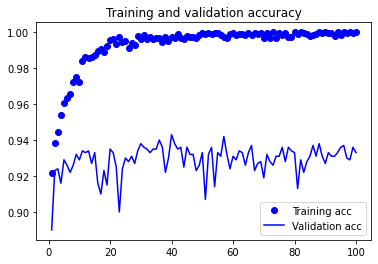

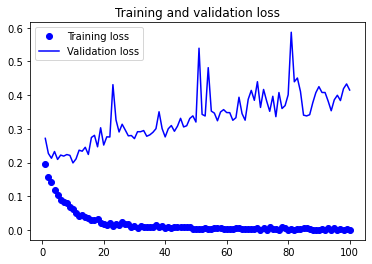

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 코드 5-24 부드러운 그래프 그리기

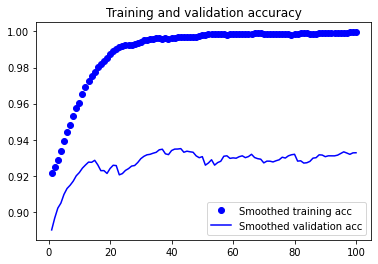

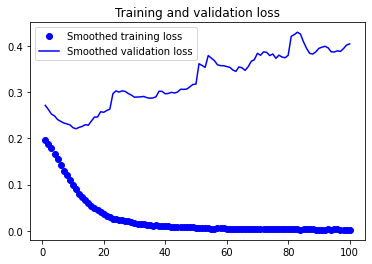

In [22]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

정확도가 대략 1% 향상 되었습니다.

손실 곡선은 실제 어떤 향상을 얻지 못했습니다(사실 악화되었습니다). 손실이 감소되지 않았는데 어떻게 정확도가 안정되거나 향상될 수 있을까요? 답은 간단합니다. 그래프는 개별적인 손실 값의 평균을 그린 것입니다. 하지만 정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아닙니다. 정확도는 모델이 예측한 클래스 확률이 어떤 임계 값을 넘었는지에 대한 결과이기 때문입니다. 모델이 더 향상되더라도 평균 손실에 반영되지 않을 수 있습니다.

In [37]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


InternalError: GPU sync failed